In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img_path = '/content/drive/MyDrive/Colab Notebooks/40-Day Python/Day-34_Denoising_dataset/2.jpg'

# cv2.GaussianBlur(img, ksize = (0,0), sigmaX)

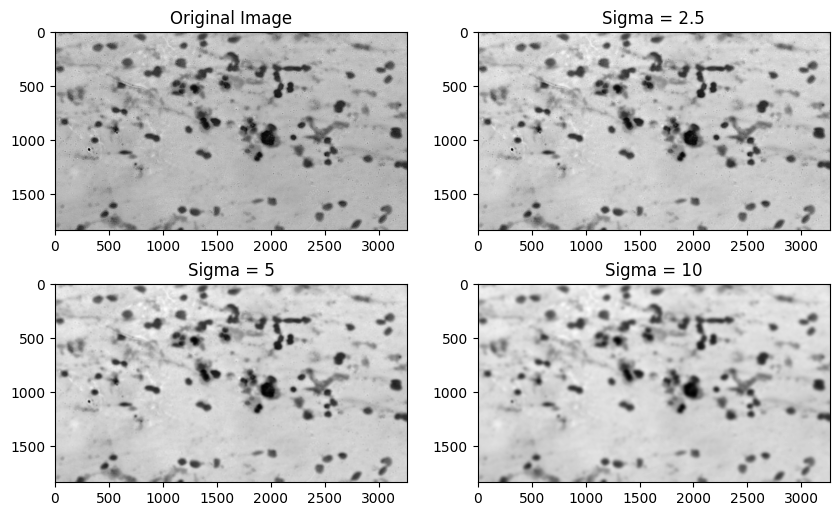

In [19]:
# Load image
img = cv2.imread(img_path,0)

# Original Image
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(img,cmap='gray')

# Blurred Image
blur_2 = cv2.GaussianBlur(img, ksize = (0,0), sigmaX = 2.5)
plt.subplot(2,2,2)
plt.title('Sigma = 2.5')
plt.imshow(blur_2,cmap='gray')

blur_5 = cv2.GaussianBlur(img, ksize = (0,0), sigmaX = 5)
plt.subplot(2,2,3)
plt.title('Sigma = 5')
plt.imshow(blur_5,cmap='gray')

blur_10 = cv2.GaussianBlur(img, ksize = (0,0), sigmaX = 10)
plt.subplot(2,2,4)
plt.title('Sigma = 10')
plt.imshow(blur_10,cmap='gray')

# Show the plot
plt.show()

# cv2.filter2D(img, -1, kernel)

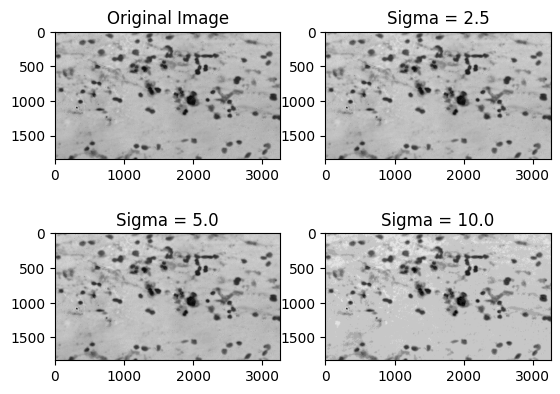

In [42]:
# Gaussian function
def gaussian_kernel(size, sigma):
  if size % 2 == 0:
    size += 1
  max_point = size // 2 # both directions (x,y) maximum cell start point
  min_point = -max_point # both directions (x,y) minimum cell start point

  K = np.zeros((size,size)) # kernel matrix
  for x in range(min_point,max_point + 1):
    for y in range(min_point,max_point + 1):
      value = (1/(2*np.pi*sigma**2))*np.exp(-(x**2+y**2)/(2*sigma**2))
      K[x-min_point, y-min_point] = value
  return K


img_fil2D = cv2.imread(img_path,0)
sigma_lst = [2.5, 5.0, 10.0]

# Original Image
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(img_fil2D,cmap='gray')

# Blurred Image
for i, sigma in enumerate(sigma_lst):
  kernel = gaussian_kernel(5, sigma)
  img_gauss = cv2.filter2D(img_fil2D, -1, kernel)
  plt.subplot(2, 2, i+2)
  plt.title(f'Sigma = {sigma}')
  plt.imshow(img_gauss,cmap='gray')

# Show the plot
plt.show()